# Basic Simple 1 layer Artificial Neural Network

Here, we will be working with a simple regression problem containing a single feature and a single label.

## 1) Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn

## 2) Creating a simple dataset

In [79]:
# Feature

X = torch.linspace(1,1000,1000).reshape(-1,1)

#adding some noise to label
noise = np.random.randint(-5,5,size = 1000).reshape(-1,1)
y = 5*X + noise
#y = torch.FloatTensor(y).reshape(-1,1)

len(X), len(y), type(X), type(y), X.shape, y.shape

(1000,
 1000,
 torch.Tensor,
 torch.Tensor,
 torch.Size([1000, 1]),
 torch.Size([1000, 1]))

## 3) Dividing the data into train and test data

In [80]:
# we will be using our 90% data as train set and the remaining data as test set
train_size = 0.9 
s = int(len(X)*0.9)
X_train = X[:s]
X_test = X[s:]
y_train = y[:s]
y_test = y[s:]

len(X_train), len(X_test), len(y_train), len(y_test)

(900, 100, 900, 100)

## 4) Defining the ANN model

In [0]:
class ANN(nn.Module):
  def __init__(self,in_features,out_features,hidden_dim):
    super().__init__()

    self.in_features = in_features
    self.out_features = out_features
    
    # Our model :   Input layer ----> Output

    self.fc1 = nn.Linear(self.in_features,hidden_dim)
    self.fc2 = nn.Linear(hidden_dim,self.out_features)

  def forward(self,X):
    X = self.fc1(X)
    y_pred = self.fc2(X)
    return y_pred
    

## 5) Instantiating the model

In [82]:
model = ANN(1,1,256)
model

ANN(
  (fc1): Linear(in_features=1, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=1, bias=True)
)

## 6) Training the model


 Defining the loss function and the optimizer

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [84]:
# Training

epochs = 1000
losses = []

for i in range(epochs):
  i+=1

  #Predicting the output
  y_pred = model.forward(X_train)

  #calculating the loss
  loss = criterion(y_train,y_pred)

  losses.append(loss)

  if i%100 == 0:
    print(f'Epoch : {i}    Loss : {loss.item()}')

  # Making the gradients zero for backward propagation
  optimizer.zero_grad()

  # Backward Propagation
  loss.backward()
  
  optimizer.step()


Epoch : 100    Loss : 237.23726120720403
Epoch : 200    Loss : 8.276562848459825
Epoch : 300    Loss : 8.266860271535055
Epoch : 400    Loss : 8.266703430147416
Epoch : 500    Loss : 8.266558231482001
Epoch : 600    Loss : 8.266355142558513
Epoch : 700    Loss : 8.26621124815657
Epoch : 800    Loss : 8.265973842366671
Epoch : 900    Loss : 8.265748363559698
Epoch : 1000    Loss : 8.265524892462395


## 7) Plotting the curve between loss and epochs

Text(0, 0.5, 'Losses')

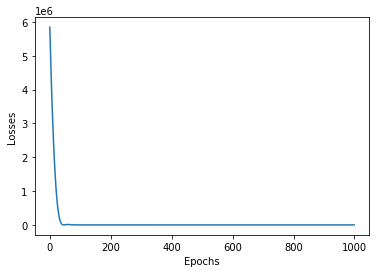

In [87]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')

## 8) Predicting the output for test data

In [88]:
print(model.parameters())

<generator object Module.parameters at 0x7f668546ee08>


In [93]:
#Predicting the output
with torch.no_grad():
  y_p = model(X_test)

  loss = criterion(y_test,y_p)

  print(f'Loss : {loss.item()}')

Loss : 8.406754851341248


No handles with labels found to put in legend.


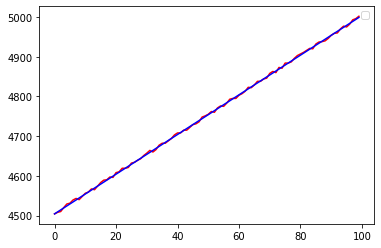

In [97]:
plt.plot(y_test,'r')
plt.plot(y_p,'b')
plt.legend()

In [101]:
print(y_test.flatten()) , print(y_p.flatten())

tensor([4504., 4508., 4510., 4520., 4529., 4531., 4539., 4543., 4540., 4548.,
        4556., 4559., 4567., 4565., 4574., 4583., 4589., 4590., 4597., 4596.,
        4608., 4610., 4619., 4619., 4621., 4632., 4634., 4639., 4643., 4651.,
        4657., 4664., 4660., 4666., 4677., 4682., 4682., 4688., 4694., 4703.,
        4708., 4708., 4715., 4715., 4722., 4729., 4731., 4736., 4748., 4751.,
        4755., 4762., 4760., 4771., 4776., 4775., 4783., 4793., 4795., 4795.,
        4803., 4807., 4813., 4823., 4822., 4829., 4838., 4838., 4844., 4846.,
        4858., 4863., 4860., 4873., 4871., 4884., 4884., 4887., 4896., 4903.,
        4907., 4911., 4916., 4921., 4920., 4932., 4937., 4938., 4940., 4946.,
        4954., 4959., 4960., 4970., 4977., 4975., 4982., 4993., 4996., 5002.],
       dtype=torch.float64)
tensor([4504.1016, 4509.1006, 4514.1001, 4519.0991, 4524.0977, 4529.0972,
        4534.0957, 4539.0947, 4544.0938, 4549.0928, 4554.0918, 4559.0908,
        4564.0898, 4569.0889, 4574.0879, 45

(None, None)